In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
all_data = pd.read_excel('./project_data/all_data.xlsx')

In [5]:
all_data

,PLAYER,YEAR,MIN,advanced_data.advanced_OFFRTG,advanced_data.advanced_DEFRTG,advanced_data.advanced_NETRTG,advanced_data.advanced_AST%,advanced_data.advanced_AST/TO,advanced_data.advanced_AST Ratio,advanced_data.advanced_OREB%,...,usage_data1.use_%DREB,usage_data1.use_%REB,usage_data1.use_%AST,usage_data1.use_%TOV,usage_data1.use_%STL,usage_data1.use_%BLK,usage_data1.use_%BLKA,usage_data1.use_%PF,usage_data1.use_%PFD,usage_data1.use_%PTS
0,_2000_Shaquille O'Neal,2000,3165,107.7,96.2,11.5,18.4,1.34,11.8,10.5,...,33.7,34.9,18.9,24.7,7.5,53.7,23.5,18.6,0.7,35.0
1,_2000_Allen Iverson,2000,2856,102.0,99.9,2.0,22.0,1.43,12.8,2.4,...,11.3,10.3,24.5,26.0,24.8,1.7,35.3,11.8,2.3,34.3
2,_2000_Tim Duncan,2000,2879,103.6,95.0,8.6,15.2,0.97,11.5,9.8,...,32.9,34.5,17.2,26.8,15.1,39.2,32.5,17.1,1.4,29.7
3,_2000_Karl Malone,2000,2946,109.4,100.7,8.6,19.7,1.32,13.0,6.4,...,34.2,32.1,18.4,26.6,15.6,22.3,27.7,15.4,1.5,33.8
4,_2000_Chris Gatling,2000,1810,99.4,100.6,-1.3,6.8,0.42,5.9,8.0,...,30.1,29.5,9.0,25.6,26.7,10.6,26.8,25.0,4.2,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8506,_2022_Royce O'Neale,2022,2406,115.8,110.5,5.3,10.4,2.42,25.9,2.7,...,17.2,16.2,16.7,11.6,23.6,12.5,7.2,19.0,7.6,10.0
8507,_2022_John Konchar,2022,1292,109.7,107.0,2.7,10.9,3.76,25.8,5.9,...,26.3,24.9,16.0,8.2,16.1,12.9,2.7,16.1,8.6,11.6
8508,_2022_Matisse Thybulle,2022,1685,110.9,107.2,3.8,6.3,1.92,17.4,2.6,...,9.5,10.6,9.1,9.5,36.4,34.5,5.3,23.2,7.1,10.1
8509,_2022_Nerlens Noel,2022,562,104.1,109.8,-5.7,6.0,1.15,19.8,8.4,...,23.5,28.2,9.3,12.4,31.6,60.8,9.3,27.1,18.7,7.1


In [6]:
scalered_data_by_year = {}
for i in range(2000,2023):
    # select the data from that year
    df = all_data[all_data["YEAR"] == i]
    df = df.drop(columns=["PLAYER","YEAR"])
    df_array = df.to_numpy()
    scaler = MinMaxScaler()
    scaler.fit(df_array)
    scalered_df = scaler.transform(df_array)
    scalered_data_by_year[i] = scalered_df

In [7]:
scalered_data_by_year

{2000: array([[0.90436723, 0.83333333, 0.26457399, ..., 0.30617978, 0.08641975,
         1.        ],
        [0.80586548, 0.60162602, 0.43049327, ..., 0.11516854, 0.28395062,
         0.9771987 ],
        [0.81319732, 0.66666667, 0.21076233, ..., 0.26404494, 0.17283951,
         0.82736156],
        ...,
        [0.00860695, 0.38617886, 0.39910314, ..., 0.42696629, 0.0617284 ,
         0.26710098],
        [0.01466369, 0.53252033, 0.62331839, ..., 0.95786517, 0.13580247,
         0.247557  ],
        [0.01912655, 0.62195122, 0.87892377, ..., 0.48595506, 0.44444444,
         0.        ]]),
 2001: array([[0.92493557, 0.51340996, 0.57803468, ..., 0.03519062, 0.        ,
         1.        ],
        [0.8492268 , 0.63601533, 0.35260116, ..., 0.07917889, 0.07692308,
         1.        ],
        [0.8318299 , 0.95785441, 0.70520231, ..., 0.30791789, 0.        ,
         0.90228013],
        ...,
        [0.01159794, 0.31417625, 0.3583815 , ..., 0.35483871, 0.        ,
         0.2247557 ],


In [8]:
#merge all the arrays to one
arr = scalered_data_by_year[2000]
for i in range(2001,2023):
    arr = np.vstack((arr,scalered_data_by_year[i]))

In [9]:
# implement pca
pca = PCA()
pca.fit_transform(arr)

array([[ 2.09663515e+00,  2.38658292e+00, -2.94596048e-01, ...,
        -3.15337266e-17,  1.24457564e-15, -3.80343094e-16],
       [ 2.38509862e+00, -5.70972145e-01, -7.09454682e-01, ...,
         3.59525827e-16,  1.40355355e-16,  2.19455938e-16],
       [ 1.78282925e+00,  1.99452595e+00, -3.53643623e-01, ...,
        -5.22086579e-16,  1.90846422e-16,  7.86936094e-16],
       ...,
       [-2.32251525e-01, -5.05005435e-01,  9.99786384e-01, ...,
        -5.75777196e-17,  6.89776077e-17, -6.29124541e-17],
       [-1.00704048e+00,  7.89230090e-01,  5.43149215e-01, ...,
         7.56953163e-17, -1.19856969e-16, -5.93596810e-17],
       [-1.59671122e+00,  9.29830800e-01,  6.01814984e-01, ...,
        -5.60269986e-17,  2.74436718e-17, -2.60873106e-17]])

In [10]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
print(d)

13


In [11]:
pca = PCA()
pca.fit_transform(arr)
print(pca.explained_variance_ratio_)

[3.22333688e-01 2.62046163e-01 6.38794941e-02 5.98088512e-02
 4.59652065e-02 3.21050900e-02 2.54499156e-02 2.24816499e-02
 2.04375235e-02 1.62405139e-02 1.36301977e-02 1.27826960e-02
 1.18438093e-02 9.54538152e-03 8.78391439e-03 8.56394593e-03
 8.27017254e-03 6.87349550e-03 5.75285493e-03 5.53853001e-03
 4.85410607e-03 3.24334499e-03 2.90950113e-03 2.58508925e-03
 2.13665244e-03 2.02867935e-03 1.74096524e-03 1.65874930e-03
 1.58456478e-03 1.42783618e-03 1.32542812e-03 1.21670250e-03
 1.10645432e-03 1.06918170e-03 9.01167700e-04 8.11816784e-04
 7.82009983e-04 6.84472077e-04 6.03531644e-04 5.44691045e-04
 5.14560929e-04 4.85383483e-04 4.12176283e-04 3.68942491e-04
 3.50946299e-04 3.15262839e-04 2.81880167e-04 2.28621497e-04
 1.98886164e-04 1.89929430e-04 1.78625939e-04 1.64769020e-04
 1.30560647e-04 1.13207852e-04 1.05054286e-04 7.73236916e-05
 7.34172330e-05 6.06644430e-05 4.96679595e-05 4.59934773e-05
 3.30078456e-05 3.08282922e-05 2.31120285e-05 1.63648907e-05
 2.77507469e-06 2.191140

In [12]:
explained_variance = []
for i in range(len(pca.explained_variance_ratio_)):
    explained_variance.append(sum(pca.explained_variance_ratio_[0:i+1]))
explained_variance    

[0.32233368766896897,
 0.5843798506572698,
 0.648259344724905,
 0.7080681959235808,
 0.7540334024416547,
 0.7861384924688967,
 0.8115884080232649,
 0.8340700579390069,
 0.8545075814036254,
 0.8707480953049278,
 0.8843782930333602,
 0.8971609889898933,
 0.9090047983178122,
 0.9185501798346217,
 0.9273340942271924,
 0.9358980401599056,
 0.9441682127019875,
 0.9510417082058644,
 0.9567945631337944,
 0.9623330931456429,
 0.9671871992118205,
 0.9704305442037391,
 0.9733400453314205,
 0.9759251345842453,
 0.97806178702479,
 0.980090466372448,
 0.9818314316098055,
 0.9834901809085038,
 0.9850747456876771,
 0.9865025818721441,
 0.9878280099890419,
 0.9890447124865548,
 0.9901511668067909,
 0.9912203485034191,
 0.9921215162037148,
 0.9929333329881346,
 0.9937153429713919,
 0.994399815048308,
 0.9950033466923007,
 0.9955480377369056,
 0.9960625986655034,
 0.99654798214801,
 0.9969601584314565,
 0.9973291009227465,
 0.9976800472219826,
 0.9979953100611275,
 0.9982771902282385,
 0.9985058117253232

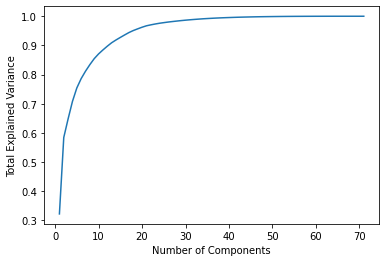

<Figure size 432x288 with 0 Axes>

In [13]:
from matplotlib import pyplot as plt 
x = np.arange(1,len(explained_variance )+1)
y = explained_variance   
plt.xlabel("Number of Components") 
plt.ylabel("Total Explained Variance") 
plt.plot(x,y) 
plt.show()
plt.savefig('explained_variance_plot.png')

In [14]:
pca = PCA(n_components = 13)
pca.fit_transform(arr)
print(pca.explained_variance_ratio_)

[0.32233369 0.26204616 0.06387949 0.05980885 0.04596521 0.03210509
 0.02544992 0.02248165 0.02043752 0.01624051 0.01363017 0.01278268
 0.01184381]


In [15]:
print(pca.components_[0])
len(pca.components_[0])

[ 0.24027004  0.09522955  0.03550574  0.05032651  0.10346435  0.04694296
  0.03804282 -0.06268207 -0.008069   -0.02942492 -0.04193788  0.02795879
  0.0517238   0.13562025 -0.0176734   0.12007507  0.23710887  0.03558059
  0.108263   -0.00811031 -0.01170436  0.13974411  0.04192744  0.02863238
 -0.0490405   0.21103512  0.21458286  0.19620217  0.22850327  0.10291732
  0.25401898  0.20114766  0.2076986   0.20886706  0.01163198  0.13076065
  0.13800197  0.05231352  0.14926177  0.14475324  0.0652975   0.03702539
  0.10826984  0.09131321  0.13531146  0.17255531  0.13975604  0.02863238
  0.09289646  0.20183221  0.09245844  0.02659256  0.0491356   0.13561785
  0.12870245  0.13234458  0.09102484  0.0930786   0.11573258  0.1005271
 -0.06898516 -0.01169293 -0.0338695   0.09348505  0.09294212  0.04192759
 -0.04901194  0.04184814 -0.10562754  0.06881919  0.13689031]


71

In [16]:
all_data = all_data.drop(columns = ['YEAR','PLAYER'])
all_data

,MIN,advanced_data.advanced_OFFRTG,advanced_data.advanced_DEFRTG,advanced_data.advanced_NETRTG,advanced_data.advanced_AST%,advanced_data.advanced_AST/TO,advanced_data.advanced_AST Ratio,advanced_data.advanced_OREB%,advanced_data.advanced_DREB%,advanced_data.advanced_REB%,...,usage_data1.use_%DREB,usage_data1.use_%REB,usage_data1.use_%AST,usage_data1.use_%TOV,usage_data1.use_%STL,usage_data1.use_%BLK,usage_data1.use_%BLKA,usage_data1.use_%PF,usage_data1.use_%PFD,usage_data1.use_%PTS
0,3165,107.7,96.2,11.5,18.4,1.34,11.8,10.5,21.9,16.4,...,33.7,34.9,18.9,24.7,7.5,53.7,23.5,18.6,0.7,35.0
1,2856,102.0,99.9,2.0,22.0,1.43,12.8,2.4,7.0,4.6,...,11.3,10.3,24.5,26.0,24.8,1.7,35.3,11.8,2.3,34.3
2,2879,103.6,95.0,8.6,15.2,0.97,11.5,9.8,21.7,16.2,...,32.9,34.5,17.2,26.8,15.1,39.2,32.5,17.1,1.4,29.7
3,2946,109.4,100.7,8.6,19.7,1.32,13.0,6.4,22.3,14.5,...,34.2,32.1,18.4,26.6,15.6,22.3,27.7,15.4,1.5,33.8
4,1810,99.4,100.6,-1.3,6.8,0.42,5.9,8.0,18.4,13.1,...,30.1,29.5,9.0,25.6,26.7,10.6,26.8,25.0,4.2,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8506,2406,115.8,110.5,5.3,10.4,2.42,25.9,2.7,12.0,7.5,...,17.2,16.2,16.7,11.6,23.6,12.5,7.2,19.0,7.6,10.0
8507,1292,109.7,107.0,2.7,10.9,3.76,25.8,5.9,18.2,11.7,...,26.3,24.9,16.0,8.2,16.1,12.9,2.7,16.1,8.6,11.6
8508,1685,110.9,107.2,3.8,6.3,1.92,17.4,2.6,6.4,4.5,...,9.5,10.6,9.1,9.5,36.4,34.5,5.3,23.2,7.1,10.1
8509,562,104.1,109.8,-5.7,6.0,1.15,19.8,8.4,16.1,12.3,...,23.5,28.2,9.3,12.4,31.6,60.8,9.3,27.1,18.7,7.1


In [17]:
sample_list = pca.components_[0]
## create a dummy list with the absolute value in the original list
dummy_list = [abs(x) for x in sample_list]
index = [sorted(dummy_list).index(x) for x in dummy_list]

for i in range(len(index)):
    if index[i] < 65:
        sample_list[i] = 0
new_pca_matrix = sample_list

In [18]:
for i in range(1,13):
    sample_list = pca.components_[i]
    ## create a dummy list with the absolute value in the original list
    dummy_list = [abs(x) for x in sample_list]
    index = [sorted(dummy_list).index(x) for x in dummy_list]

    for j in range(len(index)):
        if index[j] < 65:
            sample_list[j] = 0
    new_pca_matrix = np.vstack((new_pca_matrix,sample_list))


In [19]:
new_pca_matrix_df = pd.DataFrame(new_pca_matrix,columns =list(all_data.columns))
new_pca_matrix_df

,MIN,advanced_data.advanced_OFFRTG,advanced_data.advanced_DEFRTG,advanced_data.advanced_NETRTG,advanced_data.advanced_AST%,advanced_data.advanced_AST/TO,advanced_data.advanced_AST Ratio,advanced_data.advanced_OREB%,advanced_data.advanced_DREB%,advanced_data.advanced_REB%,...,usage_data1.use_%DREB,usage_data1.use_%REB,usage_data1.use_%AST,usage_data1.use_%TOV,usage_data1.use_%STL,usage_data1.use_%BLK,usage_data1.use_%BLKA,usage_data1.use_%PF,usage_data1.use_%PFD,usage_data1.use_%PTS
0,0.24027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240377,0.000000,0.24309,...,0.000000,0.246144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,-0.272674,0.000000,0.000000,-0.225617,0.000000,0.000000,0.0
3,0.00000,0.000000,0.000000,0.000000,0.256977,0.000000,0.348351,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.287085,0.000000,0.242038,0.000000,0.000000,0.000000,0.000000,0.0
4,0.00000,0.000000,-0.391005,0.388590,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246263,0.00000,...,0.249235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.210054,0.219284,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.193390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.302558,0.000000,0.000000,0.000000,0.000000,0.0
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,-0.272218,0.385652,0.000000,0.000000,0.000000,0.0
9,0.00000,0.000000,0.000000,0.000000,0.000000,-0.224555,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.244637,0.000000,-0.216992,0.000000,0.294211,0.000000,0.0


In [20]:
new_pca_matrix_df.to_excel('./new_pca_matrix.xlsx')

In [21]:
new_pca_matrix[0]

array([0.24027004, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23710887, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21103512, 0.21458286, 0.        , 0.22850327, 0.        ,
       0.25401898, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [22]:
pca_transformed_data = np.empty([len(arr),13])

In [23]:
n_col = 13
n_row = len(arr)
for i in range(n_col):
    for j in range(n_row):
        original_data = arr[j]
        multiplier = new_pca_matrix[i]
        pca_data = sum(x*y for x, y in list(zip(original_data, multiplier)))
        pca_transformed_data[j,i] = pca_data

print(pca_transformed_data)

[[ 1.11483243  0.69007245 -1.10166741 ...  0.14578536  0.19186991
   0.20984497]
 [ 1.12559489 -0.24378547 -1.19633422 ...  0.05700218  0.40398691
   0.3064382 ]
 [ 1.0717979   0.67329547 -1.10976135 ...  0.04510156  0.1473224
   0.2273867 ]
 ...
 [ 0.74542286 -0.03296557 -0.11957462 ...  0.27589419  0.21048305
   0.28200648]
 [ 0.41483203  0.50395406 -0.15943569 ...  0.12377571  0.30090482
   0.22689735]
 [ 0.20630957  0.62098751 -0.10953315 ...  0.22774401  0.2544465
   0.06239685]]


In [24]:
all_data = pd.read_excel('./project_data/all_data.xlsx')

In [25]:
index_values = list(all_data["PLAYER"])
column_names = ["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8","PCA_9","PCA_10","PCA_11","PCA_12","PCA_13"]
df_pca_transformed = pd.DataFrame(data = pca_transformed_data,
                                 index = index_values,
                                 columns = column_names)


In [26]:
df_pca_transformed.to_excel('./pca_transformed_data.xlsx')